In [ ]:
from keras.utils import to_categorical
from keras.preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import os
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm
from sklearn.preprocessing import LabelEncoder

In [ ]:
TRAIN_DIR = 'images/train'
TEST_DIR = 'images/test'
time_steps = 5  # 設定 LSTM 的時間步長，代表用 5 幀影像來預測當前情緒

In [4]:
def createdataframe(dir):
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir,label)):
            image_paths.append(os.path.join(dir,label,imagename))
            labels.append(label)
        print(label,"completed")
    return image_paths,labels

In [5]:
train = pd.DataFrame()
train['image'], train['label'] = createdataframe(TRAIN_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [6]:
print(train)

                                image     label
0            images/train\angry\0.jpg     angry
1            images/train\angry\1.jpg     angry
2           images/train\angry\10.jpg     angry
3        images/train\angry\10002.jpg     angry
4        images/train\angry\10016.jpg     angry
...                               ...       ...
28816  images/train\surprise\9969.jpg  surprise
28817  images/train\surprise\9985.jpg  surprise
28818  images/train\surprise\9990.jpg  surprise
28819  images/train\surprise\9992.jpg  surprise
28820  images/train\surprise\9996.jpg  surprise

[28821 rows x 2 columns]


In [7]:
test = pd.DataFrame()
test['image'], test['label'] = createdataframe(TEST_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [8]:
print(test)
print(test['image'])

                              image     label
0       images/test\angry\10052.jpg     angry
1       images/test\angry\10065.jpg     angry
2       images/test\angry\10079.jpg     angry
3       images/test\angry\10095.jpg     angry
4       images/test\angry\10121.jpg     angry
...                             ...       ...
7061  images/test\surprise\9806.jpg  surprise
7062  images/test\surprise\9830.jpg  surprise
7063  images/test\surprise\9853.jpg  surprise
7064  images/test\surprise\9878.jpg  surprise
7065   images/test\surprise\993.jpg  surprise

[7066 rows x 2 columns]
0         images/test\angry\10052.jpg
1         images/test\angry\10065.jpg
2         images/test\angry\10079.jpg
3         images/test\angry\10095.jpg
4         images/test\angry\10121.jpg
                    ...              
7061    images/test\surprise\9806.jpg
7062    images/test\surprise\9830.jpg
7063    images/test\surprise\9853.jpg
7064    images/test\surprise\9878.jpg
7065     images/test\surprise\993.jpg
Name:

In [9]:
!pip install Pillow
import PIL  # 检查是否安装成功



[notice] A new release of pip is available: 23.3.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
from tqdm.notebook import tqdm

In [11]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image,color_mode="grayscale")
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features),48,48,1)
    return features

In [12]:
train_features = extract_features(train['image'])

  0%|          | 0/28821 [00:00<?, ?it/s]

In [60]:
test_features = extract_features(test['image'])

  0%|          | 0/7066 [00:00<?, ?it/s]

In [61]:
x_train = train_features/255.0
x_test = test_features/255.0
print(test_features)

[[[[ 58]
   [ 66]
   [ 70]
   ...
   [ 51]
   [ 47]
   [ 35]]

  [[ 62]
   [ 64]
   [ 73]
   ...
   [ 59]
   [ 51]
   [ 42]]

  [[ 66]
   [ 69]
   [ 87]
   ...
   [ 58]
   [ 54]
   [ 53]]

  ...

  [[  8]
   [ 15]
   [ 19]
   ...
   [  5]
   [  7]
   [  8]]

  [[  6]
   [ 14]
   [ 17]
   ...
   [  4]
   [  7]
   [ 10]]

  [[  8]
   [ 15]
   [ 20]
   ...
   [  5]
   [  7]
   [  9]]]


 [[[ 23]
   [ 26]
   [ 21]
   ...
   [217]
   [220]
   [218]]

  [[ 25]
   [ 36]
   [ 16]
   ...
   [209]
   [203]
   [208]]

  [[ 30]
   [ 28]
   [ 11]
   ...
   [179]
   [214]
   [245]]

  ...

  [[ 48]
   [ 43]
   [ 55]
   ...
   [223]
   [222]
   [222]]

  [[ 36]
   [ 20]
   [ 64]
   ...
   [252]
   [255]
   [255]]

  [[ 59]
   [ 56]
   [ 46]
   ...
   [252]
   [252]
   [253]]]


 [[[201]
   [182]
   [182]
   ...
   [205]
   [240]
   [239]]

  [[202]
   [184]
   [181]
   ...
   [213]
   [241]
   [237]]

  [[205]
   [190]
   [183]
   ...
   [219]
   [239]
   [239]]

  ...

  [[158]
   [178]
   [196]
   

In [62]:
from sklearn.preprocessing import LabelEncoder

In [63]:
le = LabelEncoder()
le.fit(train['label'])

LabelEncoder()

In [64]:
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

In [65]:
y_train = to_categorical(y_train,num_classes = 7)
y_test = to_categorical(y_test,num_classes = 7)

In [66]:
model = Sequential()
# convolutional layers
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
# fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(7, activation='softmax'))

In [67]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = 'accuracy' )

In [68]:
model.fit(x= x_train,y = y_train, batch_size = 128, epochs = 100, validation_data = (x_test,y_test)) 

Epoch 1/100


226/226 [==============================] - 166s 725ms/step - loss: 1.8231 - accuracy: 0.2446 - val_loss: 1.7996 - val_accuracy: 0.2641
Epoch 2/100
226/226 [==============================] - 163s 720ms/step - loss: 1.7845 - accuracy: 0.2570 - val_loss: 1.7214 - val_accuracy: 0.3043
Epoch 3/100
226/226 [==============================] - 155s 687ms/step - loss: 1.6802 - accuracy: 0.3203 - val_loss: 1.5601 - val_accuracy: 0.3789
Epoch 4/100
226/226 [==============================] - 148s 656ms/step - loss: 1.5545 - accuracy: 0.3885 - val_loss: 1.4161 - val_accuracy: 0.4615
Epoch 5/100
226/226 [==============================] - 147s 652ms/step - loss: 1.4687 - accuracy: 0.4299 - val_loss: 1.3431 - val_accuracy: 0.4856
Epoch 6/100
226/226 [==============================] - 149s 660ms/step - loss: 1.4080 - accuracy: 0.4579 - val_loss: 1.3237 - val_accuracy: 0.4926
Epoch 7/100
226/226 [==============================] - 147s 653ms/step - loss: 1.3709 - accuracy: 0.4708 - val_loss:

In [69]:
model_json = model.to_json()
with open("emotiondetector.json",'w') as json_file:
    json_file.write(model_json)
model.save("emotiondetector.h5")

C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [70]:
from keras.models import model_from_json

In [71]:
json_file = open("facialemotionmodel.json", "r")
model_json = json_file.read()
json_file.close()
model = model_from_json(model_json)
model.load_weights("facialemotionmodel.h5")

In [72]:
label = ['angry','disgust','fear','happy','neutral','sad','surprise']

In [73]:
def ef(image):
    img = load_img(image,color_mode="grayscale" )
    feature = np.array(img)
    feature = feature.reshape(1,48,48,1)
    return feature/255.0

In [74]:
image = 'images/train/sad/42.jpg'
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)

original image is of sad
1/1 [==============================] - 0s 340ms/step
model prediction is  sad


In [76]:
!pip install matplotlib

     ---------------------------------------- 0.0/160.8 kB ? eta -:--:--
     ------- ------------------------------- 30.7/160.8 kB 1.4 MB/s eta 0:00:01
     -------------------------- ----------- 112.6/160.8 kB 1.1 MB/s eta 0:00:01
     ------------------------------------ - 153.6/160.8 kB 1.0 MB/s eta 0:00:01
     ------------------------------------ 160.8/160.8 kB 875.1 kB/s eta 0:00:00
   ---------------------------------------- 0.0/7.6 MB ? eta -:--:--
    --------------------------------------- 0.1/7.6 MB 7.0 MB/s eta 0:00:02
   - -------------------------------------- 0.2/7.6 MB 2.9 MB/s eta 0:00:03
   -- ------------------------------------- 0.4/7.6 MB 2.8 MB/s eta 0:00:03
   -- ------------------------------------- 0.5/7.6 MB 3.2 MB/s eta 0:00:03
   ---- ----------------------------------- 0.8/7.6 MB 3.5 MB/s eta 0:00:02
   ---- ----------------------------------- 0.9/7.6 MB 3.7 MB/s eta 0:00:02
   ---- ----------------------------------- 0.9/7.6 MB 3.7 MB/s eta 0:00:02
   ---

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

original image is of sad
1/1 [==============================] - 0s 36ms/step
model prediction is  sad


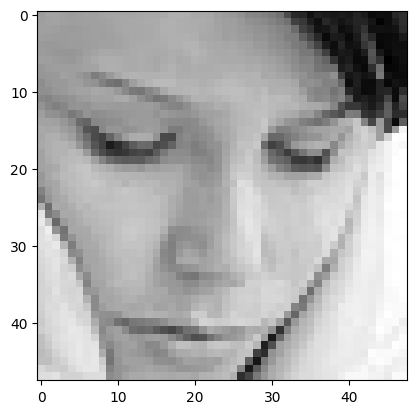

In [78]:
image = 'images/train/sad/42.jpg'
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

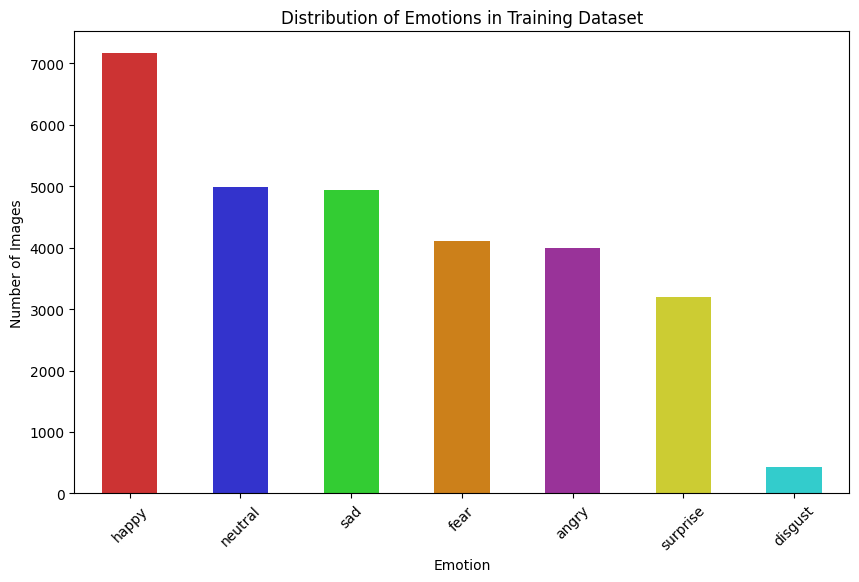

In [11]:
import matplotlib.pyplot as plt

# 計算每個情緒類別的影像數量
emotion_counts = train['label'].value_counts()

# 定義不同情緒類別對應的顏色，並降低飽和度
colors = [(0.8, 0.2, 0.2), (0.2, 0.2, 0.8), (0.2, 0.8, 0.2), (0.8, 0.5, 0.1), (0.6, 0.2, 0.6), (0.8, 0.8, 0.2), (0.2, 0.8, 0.8)]

# 繪製柱狀圖，設置顏色
plt.figure(figsize=(10, 6))
emotion_counts.plot(kind='bar', color=colors)
plt.title('Distribution of Emotions in Training Dataset')
plt.xlabel('Emotion')
plt.ylabel('Number of Images')
plt.xticks(rotation=45)
plt.show()
